 Build a random forest classifier to predict the risk of heart disease based on a dataset of patient 
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, 
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/HP/Desktop/datascience/pw_skills/ensemble/dataset_assign4.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
len(df.columns)

14

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Note- All the columns are Numeric. They are either int or float. No categorical column

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in this dataset

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
def plot_boxplot(df,feature):
    df.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

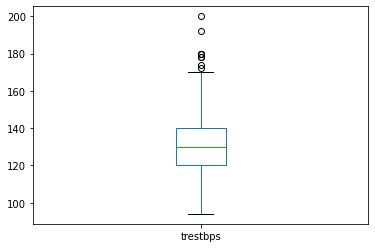

In [29]:
plot_boxplot(df,"trestbps")

In [33]:
df.columns
X = df.drop(['target'], axis = 1)
y = df['target']

In [37]:
y.value_counts()
##almost balanced dataset

1    165
0    138
Name: target, dtype: int64

## Q2. Split the dataset into a training set (70%) and a test set (30%).

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (212, 13)
X_test shape:  (91, 13)
y_train shape:  (212,)
y_test shape:  (91,)


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [40]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [41]:
scaled_X_train

array([[-1.67339636, -1.39443338,  0.95280942, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-2.76362385,  0.71713717, -0.01367669, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-0.47414611, -1.39443338,  0.95280942, ..., -0.67796691,
        -0.67629057, -0.54888242],
       ...,
       [ 1.59728613,  0.71713717,  1.91929553, ..., -0.67796691,
         0.37792709, -0.54888242],
       [-0.91023711,  0.71713717, -0.9801628 , ...,  0.955317  ,
        -0.67629057,  1.13753893],
       [ 0.94314964, -1.39443338, -0.01367669, ...,  0.955317  ,
         1.43214475, -0.54888242]])

## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

No missing values, categorical variables, and scaling done

## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Use 40 random trees
rfc = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=101)

In [47]:
rfc.fit(scaled_X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=101)

In [48]:
pred = rfc.predict(scaled_X_test)

## Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score. 

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [50]:
confusion_matrix(y_test,pred)

array([[33,  8],
       [ 7, 43]], dtype=int64)

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart ## disease risk. Visualise the feature importances using a bar chart.

In [52]:
rfc.feature_importances_

array([0.0803787 , 0.03552816, 0.12345923, 0.07389125, 0.07305583,
       0.01367128, 0.01816764, 0.11190993, 0.06334849, 0.11296701,
       0.05008914, 0.13052498, 0.11300836])

In [56]:
#Get the indices of the top 5 most important features
top5_indices = rfc.feature_importances_.argsort()[-5:][::-1]

In [58]:
# Get the names of the top 5 most important features
top5_features = [X.columns[i] for i in top5_indices]

In [59]:
top5_features

['ca', 'cp', 'thal', 'oldpeak', 'thalach']

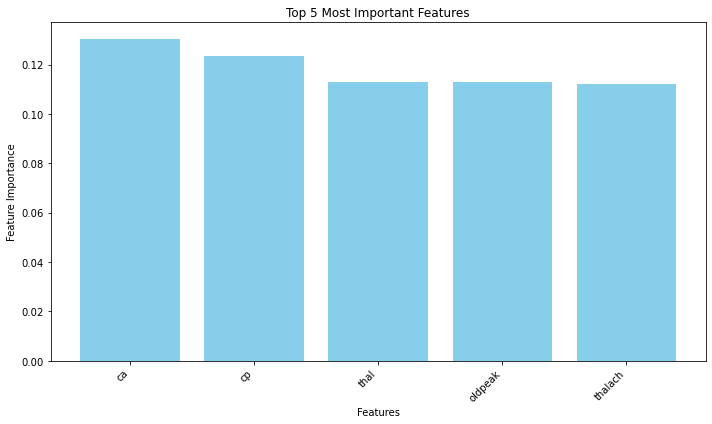

In [61]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(top5_features, rfc.feature_importances_[top5_indices], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 5 Most Important Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [62]:
## Hypeparameter Tuning
params={'max_depth':[3,5,10],
        'min_samples_split': [2,5,10,15,20],
        'min_samples_leaf': [2,5,10,20],
        'n_estimators':[50,75, 100],
        'criterion':['gini','entropy']
        }

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
cv=RandomizedSearchCV(rfc,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=20, min_samples_split=15, n_estimators=100;, score=0.907 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=20, min_samples_split=15, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=20, min_samples_split=15, n_estimators=100;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=20, min_samples_split=15, n_estimators=100;, score=0.881 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=20, min_samples_split=15, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=0.860 total time=  

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=101),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10],
                                        'min_samples_leaf': [2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 75, 100]},
                   scoring='accuracy', verbose=3)

In [65]:
cv.best_params_

{'n_estimators': 50,
 'min_samples_split': 20,
 'min_samples_leaf': 20,
 'max_depth': 3,
 'criterion': 'gini'}

In [67]:
# Use 40 random trees
rfc2 = RandomForestClassifier(n_estimators=50,max_depth=3,min_samples_split= 20,min_samples_leaf= 20,criterion= 'gini', random_state=101)

In [68]:
rfc2.fit(scaled_X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=20,
                       n_estimators=50, random_state=101)

In [69]:
pred = rfc2.predict(scaled_X_test)

In [70]:
confusion_matrix(y_test,pred)

array([[32,  9],
       [ 7, 43]], dtype=int64)

In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

best parameters: 
{'n_estimators': 50,
 'min_samples_split': 20,
 'min_samples_leaf': 20,
 'max_depth': 3,
 'criterion': 'gini'}

Not much difference in performance

In [72]:
rfc2.feature_importances_

array([0.02998757, 0.03144612, 0.16715319, 0.00628743, 0.01530116,
       0.        , 0.00271953, 0.13008103, 0.10978274, 0.09856759,
       0.08784696, 0.17157504, 0.14925165])

In [76]:
#Get the indices of the top 5 most important features
top5_indices = rfc2.feature_importances_.argsort()[-5:][::-1]

In [77]:
# Get the names of the top 5 most important features
top5_features = [X.columns[i] for i in top5_indices]

In [78]:
top5_features

['ca', 'cp', 'thal', 'thalach', 'exang']

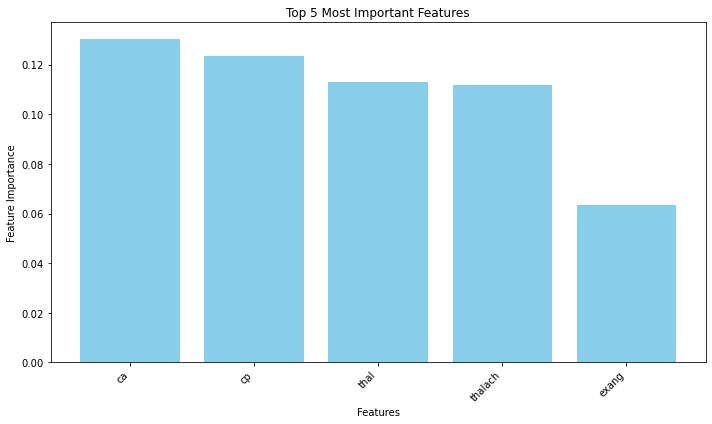

In [79]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(top5_features, rfc.feature_importances_[top5_indices], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 5 Most Important Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()